## Problem Statement  
# Social Network Ad's (digital marketing Domain)     --- Using K nearest neighbours
### Predict : User will purchase the product or not
### if User purchase -> show ad
### if User won't purchase -> don't show the ad 

## Read the dataset 

In [26]:
#import libraries
import pandas as pd 

# read the dataset
dataset = pd.read_csv("Social_Network_Ads.csv")
print(dataset)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


## data Preprocessing 

In [27]:
# convert categorial data into numerical data
dataset = pd.get_dummies(dataset, drop_first=True,dtype=int)
print(dataset)

      User ID  Age  EstimatedSalary  Purchased  Gender_Male
0    15624510   19            19000          0            1
1    15810944   35            20000          0            1
2    15668575   26            43000          0            0
3    15603246   27            57000          0            0
4    15804002   19            76000          0            1
..        ...  ...              ...        ...          ...
395  15691863   46            41000          1            0
396  15706071   51            23000          1            1
397  15654296   50            20000          1            0
398  15755018   36            33000          0            1
399  15594041   49            36000          1            0

[400 rows x 5 columns]


In [28]:
# Remove the unnecessary column (UserID) form the dataset   # axis = 1 (column)
dataset = dataset.drop(["User ID"], axis=1)
print(dataset)

     Age  EstimatedSalary  Purchased  Gender_Male
0     19            19000          0            1
1     35            20000          0            1
2     26            43000          0            0
3     27            57000          0            0
4     19            76000          0            1
..   ...              ...        ...          ...
395   46            41000          1            0
396   51            23000          1            1
397   50            20000          1            0
398   36            33000          0            1
399   49            36000          1            0

[400 rows x 4 columns]


## Check dataset is balanced or Imbalanced 

In [29]:
# Check whether the dataset is Balanced or Imbalanced
"""
Purchased
0    257
1    143

Imbalanced dataset
"""
output_class_count = dataset["Purchased"].value_counts()
output_class_count

Purchased
0    257
1    143
Name: count, dtype: int64

## Split input & output   |  Split train & test set 

In [30]:
# split input & output
independent = dataset[['Age', 'EstimatedSalary','Gender_Male']]
dependent = dataset[['Purchased']]
print("Input : ", independent)
print("Output : ", dependent)


Input :       Age  EstimatedSalary  Gender_Male
0     19            19000            1
1     35            20000            1
2     26            43000            0
3     27            57000            0
4     19            76000            1
..   ...              ...          ...
395   46            41000            0
396   51            23000            1
397   50            20000            0
398   36            33000            1
399   49            36000            0

[400 rows x 3 columns]
Output :       Purchased
0            0
1            0
2            0
3            0
4            0
..         ...
395          1
396          1
397          1
398          0
399          1

[400 rows x 1 columns]


In [31]:
# split train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(independent, dependent, test_size=0.30, random_state=0)

In [32]:
print(x_train,x_test,y_train,y_test )

     Age  EstimatedSalary  Gender_Male
92    26            15000            1
223   60           102000            1
234   38           112000            0
232   40           107000            1
377   42            53000            0
..   ...              ...          ...
323   48            30000            0
192   29            43000            1
117   36            52000            1
47    27            54000            0
172   26           118000            0

[280 rows x 3 columns]      Age  EstimatedSalary  Gender_Male
132   30            87000            1
309   38            50000            0
341   35            75000            1
196   30            79000            0
246   35            50000            0
..   ...              ...          ...
216   49            65000            1
259   45           131000            0
49    31            89000            0
238   46            82000            0
343   47            51000            0

[120 rows x 3 columns]      Purchased
9

## model creation | model Predicition

In [48]:
y_train = y_train.values.ravel()

In [175]:
# model creation 
from sklearn.neighbors import KNeighborsClassifier
"""
weights{‘uniform’, ‘distance’}, callable or None, default=’uniform’
algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
""" 
classifier = KNeighborsClassifier(n_neighbors=21, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')   
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=21)

In [176]:
# model prediction
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

## Model Evaluation 

In [177]:
# evaluate the model using confusion matrix
from sklearn.metrics import confusion_matrix 
test_set_matrix = confusion_matrix(y_test,y_pred)
print(test_set_matrix)

[[76  3]
 [15 26]]


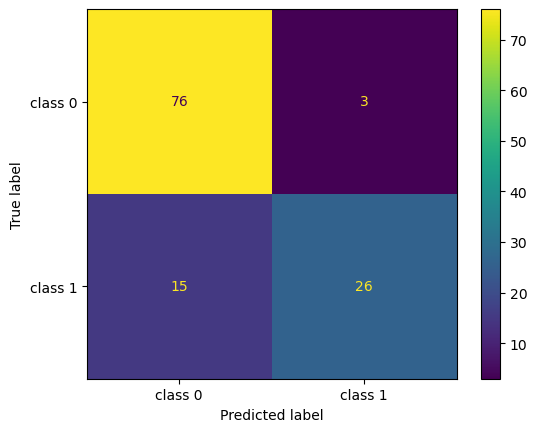

In [178]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
display_labels = ["class 0","class 1"]
disp = ConfusionMatrixDisplay(confusion_matrix = test_set_matrix, display_labels=display_labels)
disp.plot()
plt.show()

In [181]:
# classification report -- to find the derived metrics
from sklearn.metrics import classification_report 
clf_report = classification_report(y_test, y_pred)
print(clf_report)

"""
Algorithm : K nearest neighbors classifier
Accuracy (overall performance of the model)  = 0.85
overall metrics performance (precision,recall,f1-score) = good 

Result : good model but not better than Randomforestclassifier for the problem statement (social network ad)
"""

              precision    recall  f1-score   support

           0       0.84      0.96      0.89        79
           1       0.90      0.63      0.74        41

    accuracy                           0.85       120
   macro avg       0.87      0.80      0.82       120
weighted avg       0.86      0.85      0.84       120



'\nAlgorithm : K nearest neighbors classifier\nAccuracy (overall performance of the model)  = 0.85\noverall metrics performance (precision,recall,f1-score) = good \n\nResult : good model but not better than Randomforestclassifier for the problem statement (social network ad)\n'